Optimal number of features : 22


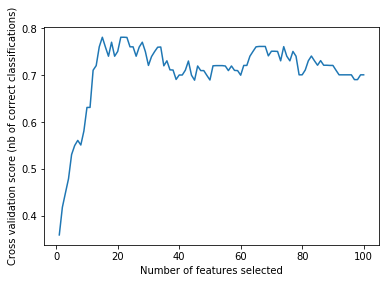

In [44]:
#%matplotlib notebook 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=100, n_features=100, n_informative=15,
                           n_redundant=4, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [45]:
import numpy as np
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Test 0 Prediction: 7 True Class: 7
Test 1 Prediction: 2 True Class: 2
Test 2 Prediction: 1 True Class: 1
Test 3 Prediction: 0 True Class: 0
Test 4 Prediction: 4 True Class: 4
Test 5 Prediction: 1 True Class: 1
Test 6 Prediction: 4 True Class: 4
Test 7 Prediction: 9 True Class: 9
Test 8 Prediction: 8 True Class: 5
Test 9 Prediction: 9 True Class: 9
Test 10 Prediction: 0 True Class: 0
Test 11 Prediction: 0 True Class: 6
Test 12 Prediction: 9 True Class: 9
Test 13 Prediction: 0 True Class: 0
Test 14 Prediction: 1 True Class: 1
Test 15 Prediction: 5 True Class: 5
Test 16 Prediction: 4 True Class: 9
Test 17 Prediction: 7 True Class: 7
Test 18 Prediction: 3 True Class: 3
Test 19 Prediction: 4 True Class: 4
Test 20 Prediction: 9 True Class: 9
Test 21 Prediction: 6 True Class: 6
Test 22 Prediction: 6 True C

In [43]:
#import numpy as np
import tensorflow as tf
fn = "SSL.csv"
fn=tf.train.string_input_producer([fn])
reader = tf.TextLineReader()
key, value = reader.read(fn)
record_defaults = [[1], [1], [1], [1], [1]]
col1, col2, col3, col4, col5 = tf.decode_csv(
    value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3, col4])

with tf.Session() as sess:
  # Start populating the filename queue.
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(1==200):
    # Retrieve a single instance:
    example, label = sess.run([features, col5])

  coord.request_stop()
  coord.join(threads)


INFO:tensorflow:Error reported to Coordinator: <class 'RuntimeError'>, Attempted to use a closed Session.


INFO:tensorflow:Error reported to Coordinator: <class 'RuntimeError'>, Attempted to use a closed Session.


InvalidArgumentError: Expect 5 fields but have 5210 in record 0
	 [[Node: DecodeCSV_3 = DecodeCSV[OUT_TYPE=[DT_INT32, DT_INT32, DT_INT32, DT_INT32, DT_INT32], field_delim=",", _device="/job:localhost/replica:0/task:0/cpu:0"](ReaderReadV2_4:1, DecodeCSV_3/record_defaults_0, DecodeCSV_3/record_defaults_1, DecodeCSV_3/record_defaults_2, DecodeCSV_3/record_defaults_3, DecodeCSV_3/record_defaults_4)]]

Caused by op 'DecodeCSV_3', defined at:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-91a607e85e92>", line 9, in <module>
    value, record_defaults=record_defaults)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/gen_parsing_ops.py", line 45, in decode_csv
    field_delim=field_delim, name=name)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Expect 5 fields but have 5210 in record 0
	 [[Node: DecodeCSV_3 = DecodeCSV[OUT_TYPE=[DT_INT32, DT_INT32, DT_INT32, DT_INT32, DT_INT32], field_delim=",", _device="/job:localhost/replica:0/task:0/cpu:0"](ReaderReadV2_4:1, DecodeCSV_3/record_defaults_0, DecodeCSV_3/record_defaults_1, DecodeCSV_3/record_defaults_2, DecodeCSV_3/record_defaults_3, DecodeCSV_3/record_defaults_4)]]


#%%sh
#%lsmagic
#%%perl
#`ls`
%profile
get_ipython().profile
$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

In [1]:
#print(mnist)
#%sh
#ls
#%load_ext fortranmagic
%load_ext rpy2.ipython
%R require(ggplot2)

/usr/local/lib/python3.4/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([0], dtype=int32)

In [3]:
import pandas as pd
df = pd.DataFrame({
        'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
        'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
        'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
        'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
    })


SyntaxError: invalid syntax (<ipython-input-3-e5da1ae69079>, line 8)

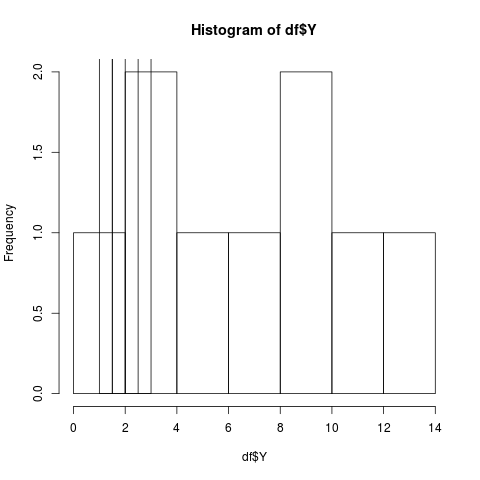

In [24]:
%%R -i df
#ggplot(data = df) + geom_point(aes(x = Y, y= X, color = Letter, size = Z))
hist(df$Y)
hist(df$Z,add=T,color="orange")


In [3]:
%matplotlib notebook 
plt.ioff() 

In [4]:
import pandas as pd
df = pd.DataFrame({'pn':['oe', 'ohn'],
                   'cn': ["tr"
                               " v. "*3]*2,
                   'column name': [5, 9]},
                  columns=['pn', 'cn', 'rame'])
df

,pn,cn,rame
0,oe,tr v. tr v. tr v.,NaN
1,ohn,tr v. tr v. tr v.,NaN


In [10]:

import altair
trades = pd.DataFrame({
    'time': pd.to_datetime(['20160525 13:30:00.023',
'20160525 13:30:00.038',
'20160525 13:30:00.048',
'20160525 13:30:00.048',
'20160525 13:30:00.048']),
'Protein': ['AID', 'MSFT',
'XRCC1', 'MPG', 'UNG2'],
'Log2SILAC': [51.95, 51.95,
720.77, 720.92, 98.00],
'Intensity': [75, 155,
100, 100, 100]},
columns=['time', 'Protein', 'Log2SILAC', 'Intensity'])
trades

,time,Protein,Log2SILAC,Intensity
0,2016-05-25 13:30:00.023,AID,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,XRCC1,720.77,100
3,2016-05-25 13:30:00.048,MPG,720.92,100
4,2016-05-25 13:30:00.048,UNG2,98.00,100


In [8]:
from theano.tensor.signal import pool

input = T.dtensor4('input')
maxpool_shape = (2, 2)
pool_out = pool.pool_2d(input, maxpool_shape, ignore_border=True)
f = theano.function([input],pool_out)

invals = numpy.random.RandomState(1).rand(3, 2, 5, 5)
print('With ignore_border set to True:')
print( 'invals[0, 0, :, :] =\n', invals[0, 0, :, :])
print('output[0, 0, :, :] =\n', f(invals)[0, 0, :, :])

pool_out = pool.pool_2d(input, maxpool_shape, ignore_border=False)
f = theano.function([input],pool_out)
print('With ignore_border set to False:')
print('invals[1, 0, :, :] =\n ', invals[1, 0, :, :])
print('output[1, 0, :, :] =\n ', f(invals)[1, 0, :, :])

NameError: name 'T' is not defined

In [74]:
while True:
    loss = f(params)
    d_loss_wrt_params = ... # compute gradient
    params -= learning_rate * d_loss_wrt_params
    if <stopping condition is met>:
        return params

SyntaxError: invalid syntax (<ipython-input-74-78562e4fb99e>, line 5)

In [11]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [12]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [13]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [14]:
sess = tf.InteractiveSession()
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [15]:
tf.global_variables_initializer().run()

In [16]:
# Compute the new values of z: z^2 + x
zs_ = -zs*zs + xs*zs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [18]:
#for i in range(200): step.run()
tf.TensorShape(200)

TensorShape([Dimension(200)])

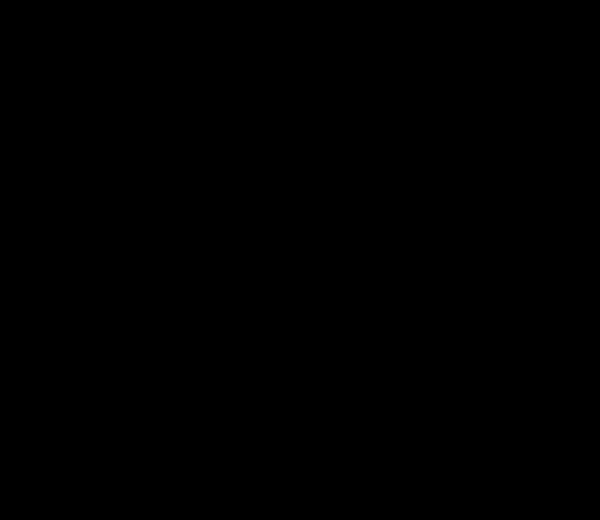

In [20]:
DisplayFractal(ns.eval())

In [21]:
m.fit(input_fn=train_input_fn, steps=200)
results = m.evaluate(input_fn=eval_input_fn, steps=1)
for key in sorted(results):
    print("%s: %s" % (key, results[key]))

NameError: name 'm' is not defined

In [22]:
import pandas as pd
from urllib.request import urlretrieve
#from urllib3 import request

# Define the column names for the data sets.
COLUMNS = ["age", "workclass", "fnlwgt", "education", "education_num",
  "marital_status", "occupation", "relationship", "race", "gender",
  "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]
LABEL_COLUMN = 'label'
CATEGORICAL_COLUMNS = ["workclass", "education", "marital_status", "occupation",
                       "relationship", "race", "gender", "native_country"]
CONTINUOUS_COLUMNS = ["age", "education_num", "capital_gain", "capital_loss",
                      "hours_per_week"]

# Download the training and test data to temporary files.
# Alternatively, you can download them yourself and change train_file and
# test_file to your own paths.
train_file = tempfile.NamedTemporaryFile()
test_file = tempfile.NamedTemporaryFile()
urlretrieve("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data", train_file.name)
urlretrieve("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.test", test_file.name)

# Read the training and test data sets into Pandas dataframe.
df_train = pd.read_csv(train_file, names=COLUMNS, skipinitialspace=True)
df_test = pd.read_csv(test_file, names=COLUMNS, skipinitialspace=True, skiprows=1)
df_train[LABEL_COLUMN] = (df_train['income_bracket'].apply(lambda x: '>50K' in x)).astype(int)
df_test[LABEL_COLUMN] = (df_test['income_bracket'].apply(lambda x: '>50K' in x)).astype(int)

def input_fn(df):
  # Creates a dictionary mapping from each continuous feature column name (k) to
  # the values of that column stored in a constant Tensor.
  continuous_cols = {k: tf.constant(df[k].values)
                     for k in CONTINUOUS_COLUMNS}
  # Creates a dictionary mapping from each categorical feature column name (k)
  # to the values of that column stored in a tf.SparseTensor.
  categorical_cols = {k: tf.SparseTensor(
      indices=[[i, 0] for i in range(df[k].size)],
      values=df[k].values,
      dense_shape=[df[k].size, 1])
                      for k in CATEGORICAL_COLUMNS}
  # Merges the two dictionaries into one.
  feature_cols =  {continuous_cols , categorical_cols}
    #dict(continuous_cols.items() + categorical_cols.items())
  # Converts the label column into a constant Tensor.
  label = tf.constant(df[LABEL_COLUMN].values)
  # Returns the feature columns and the label.
  return feature_cols, label

def train_input_fn():
  return input_fn(df_train)

def eval_input_fn():
  return input_fn(df_test)

NameError: name 'tempfile' is not defined

In [23]:
import tempfile
model_dir = tempfile.mkdtemp()
m = tf.contrib.learn.DNNLinearCombinedClassifier(
    model_dir=model_dir,
    linear_feature_columns=wide_columns,
    dnn_feature_columns=deep_columns,
    dnn_hidden_units=[100, 50])

NameError: name 'wide_columns' is not defined

In [68]:
import tensorflow as tf

# Categorical base columns.
gender = tf.contrib.layers.sparse_column_with_keys(column_name="gender", keys=["Female", "Male"])
race = tf.contrib.layers.sparse_column_with_keys(column_name="race", keys=[
  "Amer-Indian-Eskimo", "Asian-Pac-Islander", "Black", "Other", "White"])
education = tf.contrib.layers.sparse_column_with_hash_bucket("education", hash_bucket_size=1000)
relationship = tf.contrib.layers.sparse_column_with_hash_bucket("relationship", hash_bucket_size=100)
workclass = tf.contrib.layers.sparse_column_with_hash_bucket("workclass", hash_bucket_size=100)
occupation = tf.contrib.layers.sparse_column_with_hash_bucket("occupation", hash_bucket_size=1000)
native_country = tf.contrib.layers.sparse_column_with_hash_bucket("native_country", hash_bucket_size=1000)

# Continuous base columns.
age = tf.contrib.layers.real_valued_column("age")
age_buckets = tf.contrib.layers.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
education_num = tf.contrib.layers.real_valued_column("education_num")
capital_gain = tf.contrib.layers.real_valued_column("capital_gain")
capital_loss = tf.contrib.layers.real_valued_column("capital_loss")
hours_per_week = tf.contrib.layers.real_valued_column("hours_per_week")
wide_columns = [
  gender, native_country, education, occupation, workclass, relationship, age_buckets,
  tf.contrib.layers.crossed_column([education, occupation], hash_bucket_size=int(1e4)),
  tf.contrib.layers.crossed_column([native_country, occupation], hash_bucket_size=int(1e4)),
  tf.contrib.layers.crossed_column([age_buckets, education, occupation], hash_bucket_size=int(1e6))]
deep_columns = [
  tf.contrib.layers.embedding_column(workclass, dimension=8),
  tf.contrib.layers.embedding_column(education, dimension=8),
  tf.contrib.layers.embedding_column(gender, dimension=8),
  tf.contrib.layers.embedding_column(relationship, dimension=8),
  tf.contrib.layers.embedding_column(native_country, dimension=8),
  tf.contrib.layers.embedding_column(occupation, dimension=8),
  age, education_num, capital_gain, capital_loss, hours_per_week]

In [24]:
%%sh 
ls ../

notebooks
wikipedia


In [ ]:
import weka.core.jvm as jvms
jvms.start()

In [11]:
import theano
from theano import tensor as T
from theano.tensor.nnet import conv2d

import numpy

rng = numpy.random.RandomState(23455)

# instantiate 4D tensor for input
input = T.tensor4(name='input')

# initialize shared variable for weights.
w_shp = (2, 3, 9, 9)
w_bound = numpy.sqrt(3 * 9 * 9)
W = theano.shared( numpy.asarray(
            rng.uniform(
                low=-1.0 / w_bound,
                high=1.0 / w_bound,
                size=w_shp),
            dtype=input.dtype), name ='W')

# initialize shared variable for bias (1D tensor) with random values
# IMPORTANT: biases are usually initialized to zero. However in this
# particular application, we simply apply the convolutional layer to
# an image without learning the parameters. We therefore initialize
# them to random values to "simulate" learning.
b_shp = (2,)
b = theano.shared(numpy.asarray(
            rng.uniform(low=-.5, high=.5, size=b_shp),
            dtype=input.dtype), name ='b')

# build symbolic expression that computes the convolution of input with filters in w
conv_out = conv2d(input, W)

# build symbolic expression to add bias and apply activation function, i.e. produce neural net layer output
# A few words on ``dimshuffle`` :
#   ``dimshuffle`` is a powerful tool in reshaping a tensor;
#   what it allows you to do is to shuffle dimension around
#   but also to insert new ones along which the tensor will be
#   broadcastable;
#   dimshuffle('x', 2, 'x', 0, 1)
#   This will work on 3d tensors with no broadcastable
#   dimensions. The first dimension will be broadcastable,
#   then we will have the third dimension of the input tensor as
#   the second of the resulting tensor, etc. If the tensor has
#   shape (20, 30, 40), the resulting tensor will have dimensions
#   (1, 40, 1, 20, 30). (AxBxC tensor is mapped to 1xCx1xAxB tensor)
#   More examples:
#    dimshuffle('x') -> make a 0d (scalar) into a 1d vector
#    dimshuffle(0, 1) -> identity
#    dimshuffle(1, 0) -> inverts the first and second dimensions
#    dimshuffle('x', 0) -> make a row out of a 1d vector (N to 1xN)
#    dimshuffle(0, 'x') -> make a column out of a 1d vector (N to Nx1)
#    dimshuffle(2, 0, 1) -> AxBxC to CxAxB
#    dimshuffle(0, 'x', 1) -> AxB to Ax1xB
#    dimshuffle(1, 'x', 0) -> AxB to Bx1xA
output = T.nnet.sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))

# create theano function to compute filtered images
f = theano.function([input], output)

In [5]:
import numpy
import pylab
from PIL import Image

# open random image of dimensions 639x516
img = Image.open(open('/tmp/1490794527.output.png'))
# dimensions are (height, width, channel)
img = numpy.asarray(img, dtype='float64') / 256.
img_ = img.reshape(1, 3, 639, 516)

# put image in 4D tensor of shape (1, 3, height, width)
img_ = img.transpose(2, 0, 1).reshape(1, 3, 639, 516)
filtered_img = f(img_)

# plot original image and first and second components of output
pylab.subplot(1, 3, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();
# recall that the convOp output (filtered image) is actually a "minibatch",
# of size 1 here, so we take index 0 in the first dimension:
pylab.subplot(1, 3, 2); pylab.axis('off'); pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3); pylab.axis('off'); pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

Optimal number of features : 5


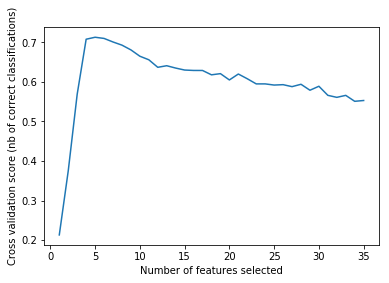

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_classes = np.unique(y).size

# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[X, E]

svm = SVC(kernel='linear')
cv = StratifiedKFold(3)

score, permutation_scores, pvalue = permutation_test_score(
    svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.547385620915 (pvalue : 0.00990099009901)


In [3]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

# import some data to play with
X, y = samples_generator.make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.SVC(kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X, y)
anova_svm.predict(X)

array([3, 2, 1, 3, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 3, 0, 0,
       3, 1, 3, 0, 2, 0, 3, 1, 3, 0, 2, 1, 0, 2, 3, 1, 3, 3, 1, 1, 2, 3, 3,
       0, 3, 1, 3, 2, 0, 3, 1, 0, 2, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 3, 3, 0,
       0, 2, 0, 1, 0, 2, 3, 2, 0, 3, 2, 0, 1, 0, 2, 1, 2, 1, 2, 3, 1, 3, 1,
       0, 3, 0, 1, 2, 3, 3, 2])

In [8]:
from PIL import Image
#anova_svm.predict(X)
im = Image.open("/tmp/1490794527.output.png")
print(im.format, im.size, im.mode, im.info)
#im.show()
#![title](/tmp/1490794527.output.png)
#from IPython.display import Image
#from IPython.core.display import HTML 
#Image(url= "http://my_site.com/my_picture.jpg")
#PATH = "/tmp/1490794527.output.png"
#Image(filename = PATH , width=100, height=100)
#Image(PATH)

PNG (888, 931) RGB {'dpi': (300, 300)}


In [17]:
from theano import *
import theano.tensor as T
x = T.dmatrix('x')
s = 1 / (1 - T.exp(-3*x))
logistic = theano.function([x], s)
logistic([[0, 1], [-1, -2]])

array([[        inf,  1.0523957 ],
       [-0.0523957 , -0.00248491]])

In [22]:
s = T.sum(1 / (1 + T.exp(-x)))
gs = T.grad(s, x)
dlogistic = theano.function([x], gs)
dlogistic([-1, -2])

TypeError: Bad input argument to theano function with name "<ipython-input-22-cfa41afc0620>:3" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-be3b950a8419>", line 3, in <module>
    x = T.dmatrix('x')
Wrong number of dimensions: expected 2, got 1 with shape (2,).

In [8]:
s2 = (1 + T.tanh(x / 2)) / 2
logistic2 = theano.function([x], s2)
logistic2([[0, 1], [-1, -2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [13]:
from theano import pp
x = T.dscalar('x')
y = x ** 2
gy = T.grad(y, x)
pp(gy)
f = theano.function([x], gy)
f(4)
numpy.allclose(f(94.2), 188.4)
pp(f.maker.fgraph.outputs[0])

'(TensorConstant{2.0} * x)'

In [17]:
jvm.stop()

In [16]:
data_dir="/home/animeshs/notebooks/"

print(data)
import weka.core.converters as converters
data = converters.load_any_file(data_dir + "iris.arff")
data.class_is_last()

print(data)

AttributeError: 'NoneType' object has no attribute 'get_object_class'

In [7]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48")
print(cls.to_help())

weka.classifiers.trees.J48

DESCRIPTION

Class for generating a pruned or unpruned C4.5 decision tree. For more information, see

Ross Quinlan (1993). C4.5: Programs for Machine Learning. Morgan Kaufmann Publishers, San Mateo, CA.

OPTIONS

-U
	Use unpruned tree.

-O
	Do not collapse tree.

-C <pruning confidence>
	Set confidence threshold for pruning.
	(default 0.25)

-M <minimum number of instances>
	Set minimum number of instances per leaf.
	(default 2)

-R
	Use reduced error pruning.

-N <number of folds>
	Set number of folds for reduced error
	pruning. One fold is used as pruning set.
	(default 3)

-B
	Use binary splits only.

-S
	Do not perform subtree raising.

-L
	Do not clean up after the tree has been built.

-A
	Laplace smoothing for predicted probabilities.

-J
	Do not use MDL correction for info gain on numeric attributes.

-Q <seed>
	Seed for random data shuffling (default 1).

-doNotMakeSplitPointActualValue
	Do not make split point actual value.

-output-debug-info
	If 

In [8]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(data)

for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=0.0, class distribution=[ 1.  0.  0.]
2: label index=0.0, class distribution=[ 1.  0.  0.]
3: label index=0.0, class distribution=[ 1.  0.  0.]
4: label index=0.0, class distribution=[ 1.  0.  0.]
5: label index=0.0, class distribution=[ 1.  0.  0.]
6: label index=0.0, class distribution=[ 1.  0.  0.]
7: label index=0.0, class distribution=[ 1.  0.  0.]
8: label index=0.0, class distribution=[ 1.  0.  0.]
9: label index=0.0, class distribution=[ 1.  0.  0.]
10: label index=0.0, class distribution=[ 1.  0.  0.]
11: label index=0.0, class distribution=[ 1.  0.  0.]
12: label index=0.0, class distribution=[ 1.  0.  0.]
13: label index=0.0, class distribution=[ 1.  0.  0.]
14: label index=0.0, class distribution=[ 1.  0.  0.]
15: label index=0.0, class distribution=[ 1.  0.  0.]
16: label index=0.0, class distribution=[ 1.  0.  0.]
17: label index=0.0, class distribution=[ 1.  0.  0.]
18: label index=0.0, class distribution=[ 1.  0.  0.]
19: label index=0.0, class distributi

In [12]:
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(data)

print(cls)

import weka.plot.graph as graph  # NB: pygraphviz and PIL are required
graph.plot_dot_graph(cls.graph)

ERROR:weka.plot.graph:Pygraphviz is not installed, cannot generate graph plot!


J48 pruned tree
------------------

petalwidth <= 0.6: Iris-setosa (50.0)
petalwidth > 0.6
|   petalwidth <= 1.7
|   |   petallength <= 4.9: Iris-versicolor (48.0/1.0)
|   |   petallength > 4.9
|   |   |   petalwidth <= 1.5: Iris-virginica (3.0)
|   |   |   petalwidth > 1.5: Iris-versicolor (3.0/1.0)
|   petalwidth > 1.7: Iris-virginica (46.0/1.0)

Number of Leaves  : 	5

Size of the tree : 	9

